Initial DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1501 entries, 0 to 1500
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   2026 Rank          1501 non-null   object 
 1   Previous Rank      1389 non-null   object 
 2   Institution Name   1501 non-null   object 
 3   Country/Territory  1501 non-null   object 
 4   Region             1501 non-null   object 
 5   Size               1500 non-null   object 
 6   Focus              1501 non-null   object 
 7   Research           1500 non-null   object 
 8   Status             1454 non-null   object 
 9   AR SCORE           1501 non-null   float64
 10  AR RANK            1501 non-null   object 
 11  ER SCORE           1501 non-null   float64
 12  ER RANK            1501 non-null   object 
 13  FSR SCORE          1501 non-null   float64
 14  FSR RANK           1501 non-null   object 
 15  CPF SCORE          1501 non-null   float64
 16  

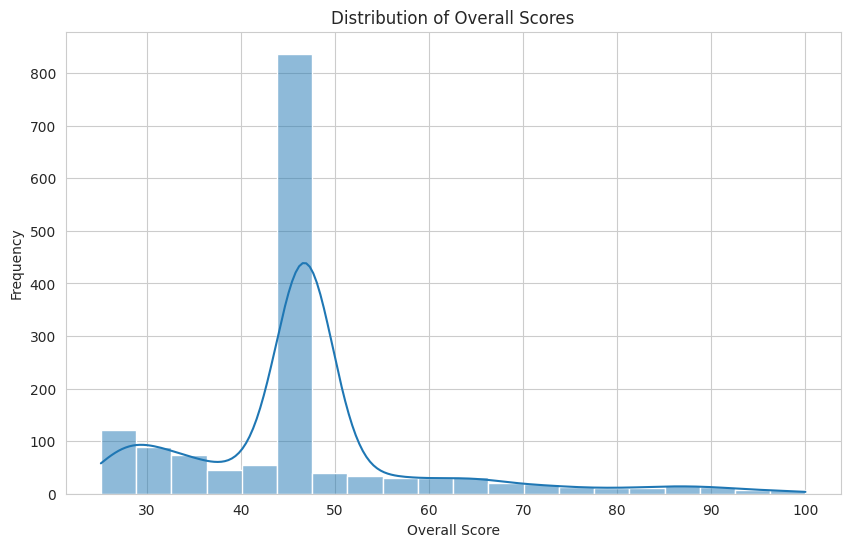

/tmp/ipython-input-17-2733493822.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Overall SCORE', y='Institution Name', data=top_10, palette='viridis')


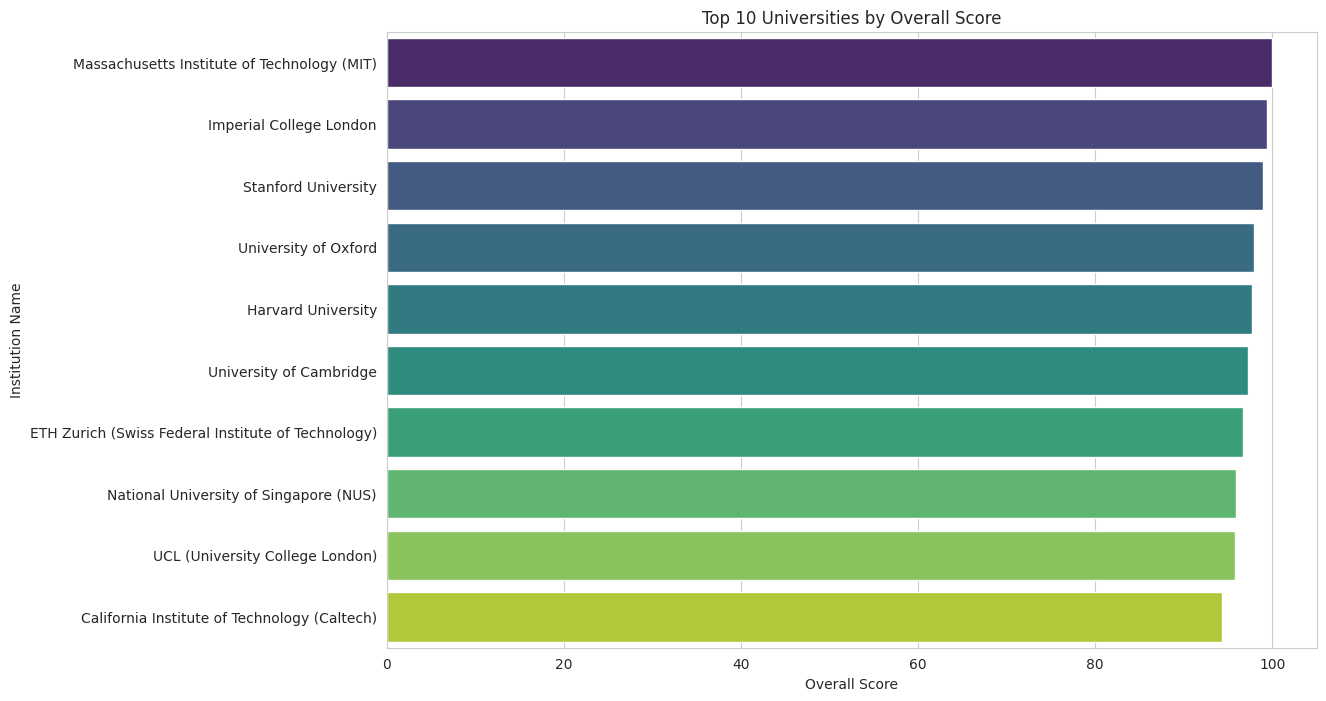

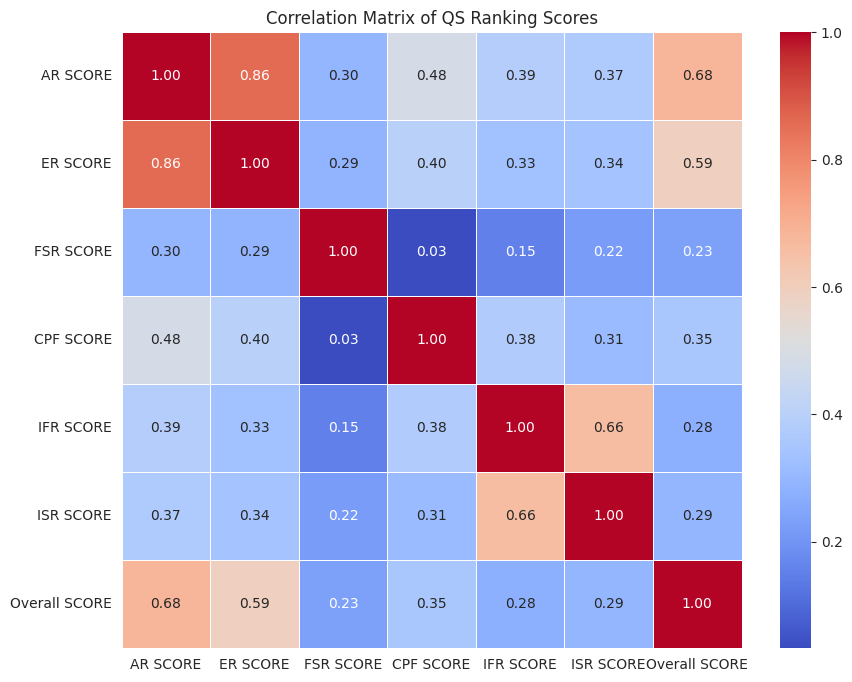

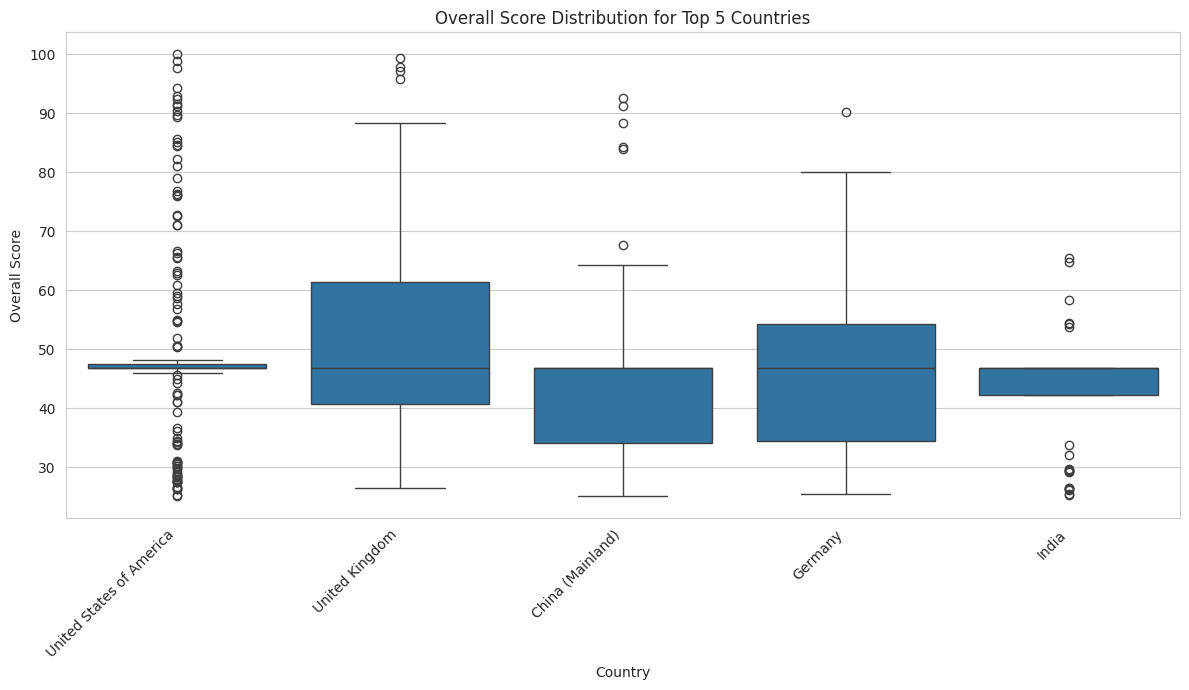

''

In [17]:
#!pip install pandas matplotlib seaborn fpdf

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
from fpdf import FPDF
import os # Import os for path handling

df = pd.read_csv('/content/2026 QS World University Rankings.csv')


# --- Cleaning and Transformation ---

# Display initial info
print("Initial DataFrame Info:")
df.info()
print("\nInitial DataFrame Head:")
print(df.head())

# Handle missing values (example: fill numerical NaNs with the mean)
# Identify numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# Handle potential duplicates
df = df.drop_duplicates()

# Example transformation: Create a new column 'Reputation Score Average'
df['Reputation Score Average'] = (df['AR SCORE'] + df['ER SCORE']) / 2

print("\nDataFrame Info after Cleaning and Transformation:")
df.info()
print("\nDataFrame Head after Cleaning and Transformation:")
print(df.head())


# --- Visualization ---

# Set plot style
sns.set_style('whitegrid')

# Plot 1: Distribution of Overall Score
# Convert 'Overall SCORE' to numeric, coercing errors
df['Overall SCORE'] = pd.to_numeric(df['Overall SCORE'], errors='coerce')
# Fill NaN values after conversion, for example, with the mean or median
df['Overall SCORE'] = df['Overall SCORE'].fillna(df['Overall SCORE'].mean())

plt.figure(1, figsize=(10, 6))
sns.histplot(df['Overall SCORE'], bins=20, kde=True)
plt.title('Distribution of Overall Scores')
plt.xlabel('Overall Score')
plt.ylabel('Frequency')
# Save figure before showing
plt.savefig("overall_score_distribution.png")
plt.show()

# Plot 2: Top 10 Universities by Overall Score
top_10 = df.sort_values(by='Overall SCORE', ascending=False).head(10)
plt.figure(2, figsize=(12, 8))
sns.barplot(x='Overall SCORE', y='Institution Name', data=top_10, palette='viridis')
plt.title('Top 10 Universities by Overall Score')
plt.xlabel('Overall Score')
plt.ylabel('Institution Name')
# Save figure before showing
plt.savefig("top_10_universities.png")
plt.show()

# Plot 3: Correlation Matrix of Scores
score_cols = ['AR SCORE', 'ER SCORE',
              'FSR SCORE', 'CPF SCORE',
              'IFR SCORE', 'ISR SCORE',
              'Overall SCORE']
corr_matrix = df[score_cols].corr()
plt.figure(3, figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of QS Ranking Scores')
# Save figure before showing
plt.savefig("correlation_matrix.png")
plt.show()

# Plot 4: Box plot of Overall Score by Top 5 Countries
top_countries = df['Country/Territory'].value_counts().nlargest(5).index
df_top_countries = df[df['Country/Territory'].isin(top_countries)]
plt.figure(4, figsize=(12, 7))
sns.boxplot(x='Country/Territory', y='Overall SCORE', data=df_top_countries)
plt.title('Overall Score Distribution for Top 5 Countries')
plt.xlabel('Country')
plt.ylabel('Overall Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
# Save figure before showing
plt.savefig("overall_score_by_country.png")
plt.show()


# --- Saving the Output as PDF ---

# Save individual plots as images
output_dir = "/content/plots"
os.makedirs(output_dir, exist_ok=True)

fig_paths = []

fig_paths.append("overall_score_distribution.png")
fig_paths.append("top_10_universities.png")
fig_paths.append("correlation_matrix.png")
fig_paths.append("overall_score_by_country.png")

# Create a PDF from the saved images
pdf = FPDF()
pdf.set_auto_page_break(auto=True, margin=15)

pdf.add_page()
pdf.set_font("Arial", size=16)
pdf.cell(200, 10, txt="QS World University Rankings Analysis", ln=1, align="C")
pdf.set_font("Arial", size=12)
pdf.cell(200, 10, txt="Analysis and Visualizations", ln=2, align="C")
pdf.ln(10) # Add some space

for img_path in fig_paths:
  if os.path.exists(img_path):
    pdf.add_page()
    pdf.image(img_path, x=10, y=20, w=190) # Adjust w for width to fit page
  else:
    print(f"Image file not found: {img_path}")

# Save the PDF
pdf_output_path = "QS_Rankings_Analysis.pdf"
pdf.output(pdf_output_path)
